ax1.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'], '.k', ms=1)
## Amphibole vs. Pyroxene - LEPR calibration datasets

In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

##  Run once, turn into pickles

In [2]:
# Amp_filt_in=pt.import_excel('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered')
# Amp=Amp_filt_in['my_oxides']
# Amp_amphead=Amp.add_suffix('_Amp')
# Amp_cpxhead=Amp.add_suffix('_Cpx')


In [3]:
# Cpx_filt_in=pt.import_excel('GEOROC_Test_Clinopyroxene_Filt.xlsx', sheet_name='Filtered')
# Cpx=Cpx_filt_in['my_oxides']
# Cpx_amphead=Cpx.add_suffix('_Amp')
# Cpx_cpxhead=Cpx.add_suffix('_Cpx')

In [4]:

# from pickle import dump
# import pickle
# dump(Cpx_amphead, open('Cpx_amphead.pkl', 'wb'))
# dump(Amp_amphead, open('Amp_amphead.pkl', 'wb'))
# dump(Cpx_cpxhead, open('Cpx_cpxhead.pkl', 'wb'))
# dump(Amp_cpxhead, open('Amp_cpxhead.pkl', 'wb'))

In [5]:
with open('Cpx_amphead.pkl', 'rb') as f:
        Cpx_amphead=load(f)
with open('Amp_amphead.pkl', 'rb') as f:
        Amp_amphead=load(f)  
with open('Cpx_cpxhead.pkl', 'rb') as f:
        Cpx_cpxhead=load(f)
with open('Amp_cpxhead.pkl', 'rb') as f:
        Amp_cpxhead=load(f)                

## Calculate Amp components for both

In [6]:
Amp_apfu_amp=pt.calculate_23oxygens_amphibole(amp_comps=Amp_amphead)
Amp_sites_GEOROC_amp=pt.get_amp_sites(Amp_apfu_amp)

Amp_apfu_cpx=pt.calculate_23oxygens_amphibole(amp_comps=Cpx_amphead)
Amp_sites_GEOROC_cpx=pt.get_amp_sites(Amp_apfu_cpx)

In [7]:
Calcic_amphiboles=Amp_amphead.loc[( (Amp_sites_GEOROC_amp['Ca_B']>1.5)
                                  & (Amp_sites_GEOROC_amp['cation_sum_All'].between(15, 16)) 
                                  &((Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'])<0.5) )]
#Calcic_amphiboles.to_excel('GEOROC_amphioles_filtered_Ca_cationsums.xlsx', sheet_name="All")

In [8]:
msk = np.random.rand(len(Calcic_amphiboles)) < 0.5
train = Calcic_amphiboles[msk]
test=Calcic_amphiboles[~msk]


In [9]:
with pd.ExcelWriter('GEOROC_amphioles_filtered_Ca_cationsums.xlsx') as writer:  # doctest: +SKIP
    Calcic_amphiboles.to_excel(writer, sheet_name='All')
    test.to_excel(writer, sheet_name='test')
    train.to_excel(writer, sheet_name='train')    

## Calculate Cpx components for both

In [10]:
Cpx_sites_GEOROC_amp=pt.calculate_clinopyroxene_components(cpx_comps=Amp_cpxhead)
Cpx_sites_GEOROC_cpx=pt.calculate_clinopyroxene_components(cpx_comps=Cpx_cpxhead)

##  Load in LEPR Stuff

In [11]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']

LEPR_Amp_cpx_heads=LEPR_Amp_PreFilt.copy()
LEPR_Amp_cpx_heads.columns = [col.replace('_Amp', '_Cpx') for col in LEPR_Amp_cpx_heads.columns]

Cpx_sites_LEPR_amp=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Amp_cpx_heads)



In [12]:
a=3.95
b=4.95
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

Cpx_sites_LEPR_cpx=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_amp_heads=LEPR_Cpx_PreFilt.copy()

LEPR_Cpx_amp_heads.columns = [col.replace('_Cpx', '_Amp') for col in LEPR_Cpx_amp_heads.columns]


In [13]:
Amp_apfu_amp_LEPR=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Amp_PreFilt)
Amp_sites_LEPR_amp=pt.get_amp_sites(Amp_apfu_amp_LEPR)

Amp_apfu_cpx_LEPR=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Cpx_amp_heads)
Amp_sites_LEPR_cpx=pt.get_amp_sites(Amp_apfu_cpx_LEPR)

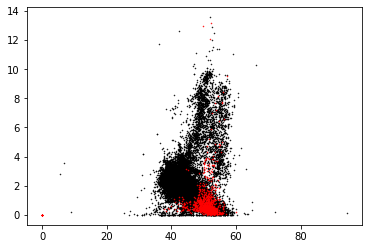

In [20]:
plt.plot(Amp_amphead['SiO2_Amp'], Amp_amphead['Na2O_Amp'], '.k', ms=1)
plt.plot(LEPR_Cpx_PreFilt['SiO2_Cpx'], LEPR_Cpx_PreFilt['Na2O_Cpx'], '.r', ms=1)


## Plot Ca B vs. Na and K (classification for Ca amphioles)

Text(0, 0.5, 'Na_A + K_A')

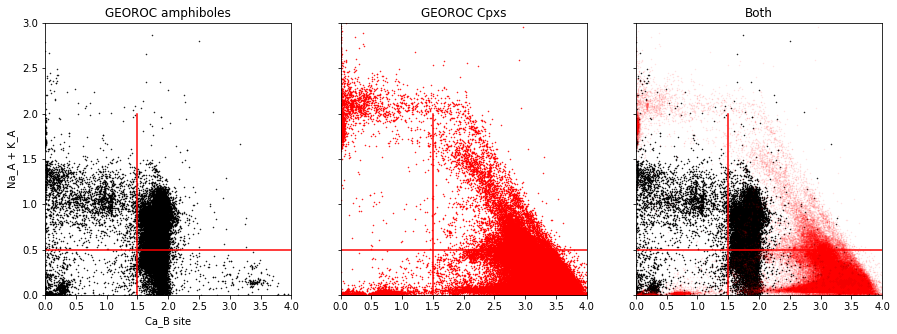

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC amphiboles')
ax1.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'], '.k', ms=1)
ax1.plot([1.5, 1.5], [0, 2], '-r')
ax1.plot([0, 4], [0.5, 0.5], '-r')

ax2.set_title('GEOROC Cpxs')
ax2.plot(Amp_sites_GEOROC_cpx['Ca_B'], Amp_sites_GEOROC_cpx['Na_A']+Amp_sites_GEOROC_cpx['K_A'], '.r', ms=1)
ax2.plot([1.5, 1.5], [0, 2], '-r')
ax2.plot([0, 4], [0.5, 0.5], '-r')

ax3.set_title('Both')
ax3.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'], '.k', ms=1)
ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'], Amp_sites_GEOROC_cpx['Na_A']+Amp_sites_GEOROC_cpx['K_A'], '.r', ms=1, alpha=0.1)
ax3.plot([1.5, 1.5], [0, 2], '-r')
ax3.plot([0, 4], [0.5, 0.5], '-r')

# Need to be >1.5 on x axis, and <0. on the y axis. 
ax1.set_xlim([0, 4])
ax1.set_ylim([0, 3])

ax1.set_xlabel('Ca_B site')
ax1.set_ylabel('Na_A + K_A')

Text(0, 0.5, 'Na_A + K_A')

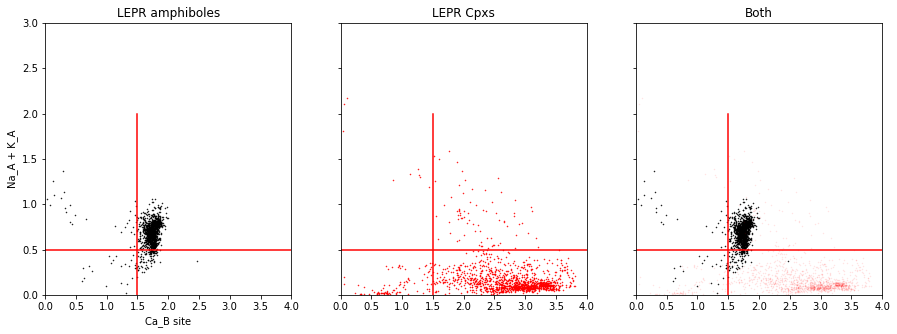

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('LEPR amphiboles')
ax1.plot(Amp_sites_LEPR_amp['Ca_B'], Amp_sites_LEPR_amp['Na_A']+Amp_sites_LEPR_amp['K_A'], '.k', ms=1)
ax1.plot([1.5, 1.5], [0, 2], '-r')
ax1.plot([0, 4], [0.5, 0.5], '-r')

ax2.set_title('LEPR Cpxs')
ax2.plot(Amp_sites_LEPR_cpx['Ca_B'], Amp_sites_LEPR_cpx['Na_A']+Amp_sites_LEPR_cpx['K_A'], '.r', ms=1)
ax2.plot([1.5, 1.5], [0, 2], '-r')
ax2.plot([0, 4], [0.5, 0.5], '-r')

ax3.set_title('Both')
ax3.plot(Amp_sites_LEPR_amp['Ca_B'], Amp_sites_LEPR_amp['Na_A']+Amp_sites_LEPR_amp['K_A'], '.k', ms=1)
ax3.plot(Amp_sites_LEPR_cpx['Ca_B'], Amp_sites_LEPR_cpx['Na_A']+Amp_sites_LEPR_cpx['K_A'], '.r', ms=1, alpha=0.1)
ax3.plot([1.5, 1.5], [0, 2], '-r')
ax3.plot([0, 4], [0.5, 0.5], '-r')

# Need to be >1.5 on x axis, and <0. on the y axis. 
ax1.set_xlim([0, 4])
ax1.set_ylim([0, 3])

ax1.set_xlabel('Ca_B site')
ax1.set_ylabel('Na_A + K_A')

## Same plot, but only using amphiboles with sums betwen 15 and 16

In [17]:
Amp_sites_GEOROC_amp

,SiO2_Amp_cat_23ox,MgO_Amp_cat_23ox,FeOt_Amp_cat_23ox,CaO_Amp_cat_23ox,Al2O3_Amp_cat_23ox,Na2O_Amp_cat_23ox,K2O_Amp_cat_23ox,MnO_Amp_cat_23ox,TiO2_Amp_cat_23ox,Cr2O3_Amp_cat_23ox,...,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Sum_T,Sum_C,Sum_B,Sum_A
0,5.979034,2.968954,1.465033,1.686671,2.519123,0.854039,0.149236,0.019572,0.310689,0.000000,...,0.242834,0.019572,0.050923,1.686671,0.803116,0.149236,8.0,4.689311,2.000000,0.952352
1,6.593846,4.237380,0.457317,1.932439,1.481145,0.990314,0.104919,0.006111,0.070545,0.179091,...,0.019325,0.006111,0.042126,1.932439,0.948188,0.104919,8.0,4.929455,2.000000,1.053108
2,6.176670,3.554697,0.627065,1.816105,2.099252,0.871721,0.159428,0.009733,0.342511,0.193058,...,0.000000,0.002985,0.180910,1.816105,0.690811,0.159428,8.0,4.657489,2.000000,0.850239
3,6.097250,3.419404,0.661664,1.866548,1.984722,0.878186,0.161125,0.006148,0.532886,0.192818,...,0.000000,0.000000,0.133452,1.866548,0.744734,0.161125,8.0,4.362005,2.000000,0.905859
4,5.357497,4.669853,0.765098,0.084693,3.933441,1.396346,0.311857,0.004959,0.002202,0.001157,...,0.765098,0.004959,0.181100,0.084693,1.215246,0.311857,8.0,4.997798,2.000000,1.527103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40036,7.092458,2.367997,2.116901,1.829029,1.314718,0.317293,0.091936,0.073756,0.125354,0.000000,...,0.017428,0.073756,0.079786,1.829029,0.237507,0.091936,8.0,4.874646,2.000000,0.329443
40037,7.181879,3.135453,1.519542,1.879261,1.080529,0.267377,0.072209,0.050433,0.128391,0.002790,...,0.048584,0.050433,0.021722,1.879261,0.245654,0.072209,8.0,4.871609,2.000000,0.317864
40038,7.083812,3.017192,1.620280,1.914616,1.218452,0.304996,0.087375,0.055017,0.097386,0.004425,...,0.041546,0.055017,0.000000,1.914616,0.304996,0.087375,8.0,4.902614,2.011179,0.392371
40039,7.151930,3.003681,1.637855,1.913104,1.130661,0.292357,0.080168,0.057454,0.097850,0.004063,...,0.026038,0.057454,0.003403,1.913104,0.288954,0.080168,8.0,4.902150,2.000000,0.369122


In [ ]:
plt.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['cation_sum_All'], '.k', ms=1)


Text(0, 0.5, 'Sum cat sites')

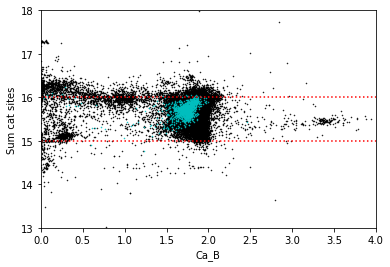

In [13]:
# plt.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['cation_sum_All'], '.k', ms=1)
# plt.xlim([0, 4])
plt.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['cation_sum_All'], '.k', ms=1)
plt.plot(Amp_sites_LEPR_amp['Ca_B'], Amp_sites_LEPR_amp['cation_sum_All'], '.c', ms=1)

plt.xlim([0, 4])
plt.plot([0, 4], [15, 15], ':r')
plt.plot([0, 4], [16, 16], ':r')
plt.ylim([13, 18])
plt.xlabel('Ca_B')
plt.ylabel('Sum cat sites')

Text(0, 0.5, "['Cpx Cat Sum']")

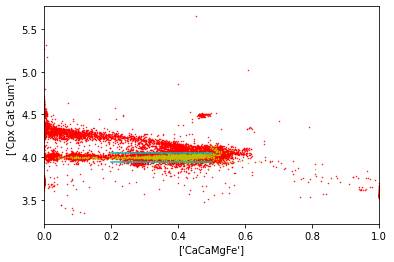

In [14]:
plt.plot(Cpx_sites_GEOROC_cpx['Ca_CaMgFe'], Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'], '.r', ms=1)
plt.plot(Cpx_sites_LEPR_cpx['Ca_CaMgFe'], Cpx_sites_LEPR_cpx['Cation_Sum_Cpx'], '.y', ms=1)

plt.xlim([0, 4])
plt.plot([0.2, 0.5], [3.95, 3.95], '-c')
plt.plot([0.2, 0.5], [4.05, 4.05], '-c')

plt.xlim([0, 1])
plt.xlabel(['CaCaMgFe'])
plt.ylabel(['Cpx Cat Sum'])

## Filters based on quality

In [15]:
fi_si_GEOROC=Amp_sites_GEOROC_amp['cation_sum_All'].between(15, 16)
cpx_4_GEOROC=(( Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'].between(3.95, 4.05)) & (Cpx_sites_GEOROC_cpx['Ca_CaMgFe'].between(0.2, 0.55)))
fi_si_LEPR=Amp_sites_LEPR_amp['cation_sum_All'].between(15, 16)
cpx_4_LEPR=(( Cpx_sites_LEPR_cpx['Cation_Sum_Cpx'].between(3.95, 4.05)) & (Cpx_sites_LEPR_cpx['Ca_CaMgFe'].between(0.2, 0.55)))


(0.0, 4.0)

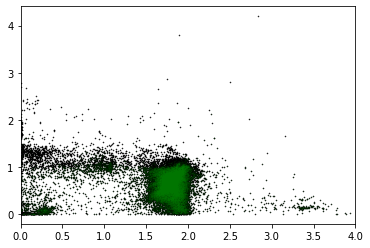

In [16]:
plt.plot(Amp_sites_GEOROC_amp['Ca_B'], Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'], '.k', ms=1)
plt.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si_GEOROC], 
         Amp_sites_GEOROC_amp['Na_A'].loc[fi_si_GEOROC]+Amp_sites_GEOROC_amp['K_A'].loc[fi_si_GEOROC], '.g', ms=1, alpha=0.1)
plt.xlim([0, 4])

(0.0, 2.0)

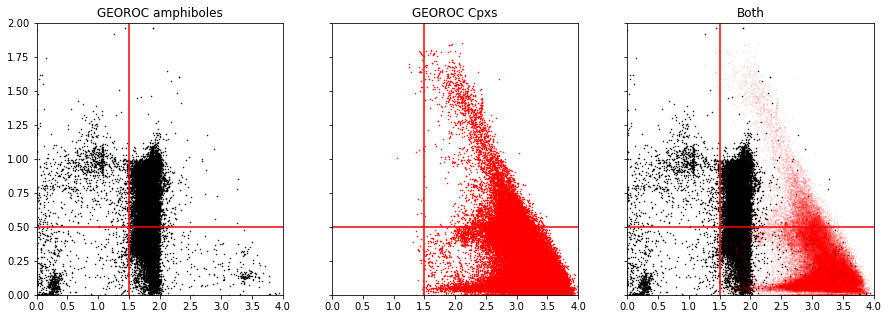

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC amphiboles')
ax1.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si_GEOROC], Amp_sites_GEOROC_amp['Na_A'].loc[fi_si_GEOROC]+Amp_sites_GEOROC_amp['K_A'].loc[fi_si_GEOROC], '.k', ms=1)
ax1.plot([1.5, 1.5], [0, 2], '-r')
ax1.plot([0, 4], [0.5, 0.5], '-r')

ax2.set_title('GEOROC Cpxs')
ax2.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], Amp_sites_GEOROC_cpx['Na_A'].loc[cpx_4_GEOROC]+Amp_sites_GEOROC_cpx['K_A'].loc[cpx_4_GEOROC], '.r', ms=1)
ax2.plot([1.5, 1.5], [0, 2], '-r')
ax2.plot([0, 4], [0.5, 0.5], '-r')

ax3.set_title('Both')
ax3.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si_GEOROC], Amp_sites_GEOROC_amp['Na_A'].loc[fi_si_GEOROC]+Amp_sites_GEOROC_amp['K_A'].loc[fi_si_GEOROC], '.k', ms=1)
ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], 
         Amp_sites_GEOROC_cpx['Na_A'].loc[cpx_4_GEOROC]+Amp_sites_GEOROC_cpx['K_A'].loc[cpx_4_GEOROC], '.r', ms=1, alpha=0.1)
ax3.plot([1.5, 1.5], [0, 2], '-r')
ax3.plot([0, 4], [0.5, 0.5], '-r')

# Need to be >1.5 on x axis, and <0. on the y axis. 
ax1.set_xlim([0, 4])
ax1.set_ylim([0, 2])

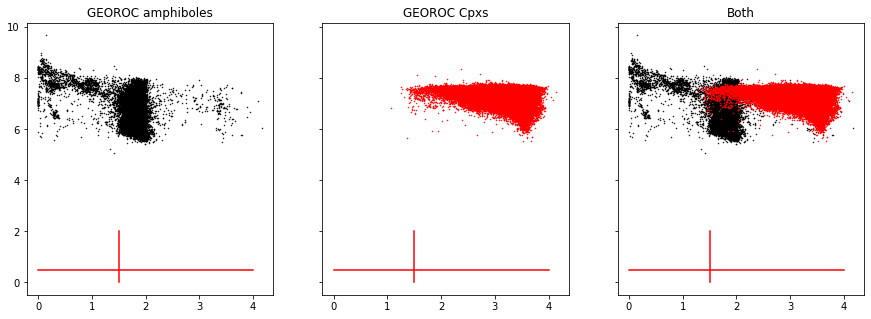

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC amphiboles')
ax1.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si_GEOROC], Amp_sites_GEOROC_amp['Si_T'].loc[fi_si_GEOROC], '.k', ms=1)
ax1.plot([1.5, 1.5], [0, 2], '-r')
ax1.plot([0, 4], [0.5, 0.5], '-r')

ax2.set_title('GEOROC Cpxs')
ax2.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], Amp_sites_GEOROC_cpx['Si_T'].loc[cpx_4_GEOROC], '.r', ms=1)
ax2.plot([1.5, 1.5], [0, 2], '-r')
ax2.plot([0, 4], [0.5, 0.5], '-r')

ax3.set_title('Both')
ax3.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si_GEOROC], Amp_sites_GEOROC_amp['Si_T'].loc[fi_si_GEOROC], '.k', ms=1)
ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], Amp_sites_GEOROC_cpx['Si_T'].loc[cpx_4_GEOROC], '.r', ms=1)
ax3.plot([1.5, 1.5], [0, 2], '-r')
ax3.plot([0, 4], [0.5, 0.5], '-r')

# Need to be >1.5 on x axis, and <0. on the y axis. 
# ax1.set_xlim([0, 4])
# ax1.set_ylim([0, 2])

# ax1.set_xlim([0, 4])
# ax1.set_ylim([0, 2])

(0.0, 4.0)

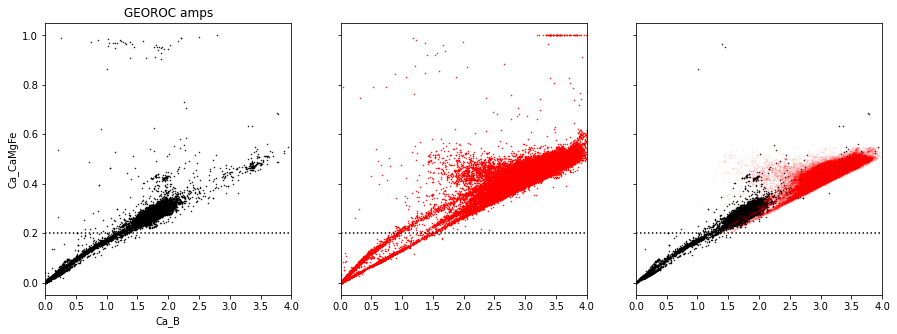

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC cpxs')
ax1.set_title('GEOROC amps')

ax1.plot(Amp_sites_GEOROC_amp['Ca_B'], Cpx_sites_GEOROC_amp['Ca_CaMgFe'], '.k', ms=1)
ax1.plot([0, 4], [0.2, 0.2], ':k')

ax2.plot(Amp_sites_GEOROC_cpx['Ca_B'], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'], '.r', ms=1)
ax2.plot([0, 4], [0.2, 0.2], ':k')

ax3.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si_GEOROC], Cpx_sites_GEOROC_amp['Ca_CaMgFe'].loc[fi_si_GEOROC], '.k', ms=1)
ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'].loc[cpx_4_GEOROC], '.r', ms=1, alpha=0.1)
ax3.plot([0, 4], [0.2, 0.2], ':k')
ax1.set_xlabel('Ca_B')
ax1.set_ylabel('Ca_CaMgFe')

ax1.set_xlim([0, 4])

(0.0, 4.0)

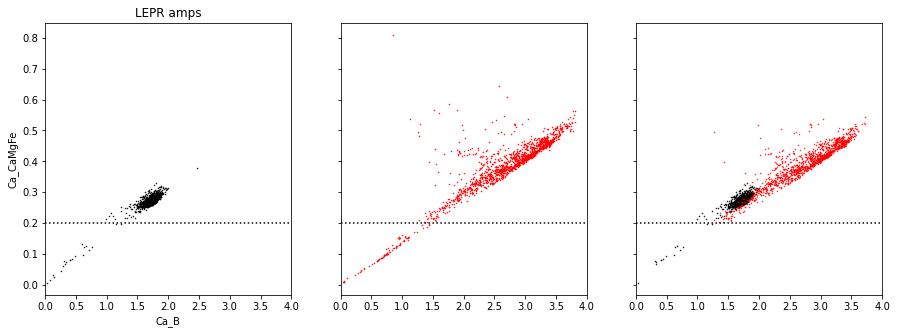

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('LEPR cpxs')
ax1.set_title('LEPR amps')

ax1.plot(Amp_sites_LEPR_amp['Ca_B'], Cpx_sites_LEPR_amp['Ca_CaMgFe'], '.k', ms=1)
ax1.plot([0, 4], [0.2, 0.2], ':k')

ax2.plot(Amp_sites_LEPR_cpx['Ca_B'], Cpx_sites_LEPR_cpx['Ca_CaMgFe'], '.r', ms=1)
ax2.plot([0, 4], [0.2, 0.2], ':k')

ax3.plot(Amp_sites_LEPR_amp['Ca_B'].loc[fi_si_LEPR], Cpx_sites_LEPR_amp['Ca_CaMgFe'].loc[fi_si_LEPR], '.k', ms=1)
ax3.plot(Amp_sites_LEPR_cpx['Ca_B'].loc[cpx_4_LEPR], Cpx_sites_LEPR_cpx['Ca_CaMgFe'].loc[cpx_4_LEPR], '.r', ms=1, alpha=0.9)
ax3.plot([0, 4], [0.2, 0.2], ':k')
ax1.set_xlabel('Ca_B')
ax1.set_ylabel('Ca_CaMgFe')

ax1.set_xlim([0, 4])

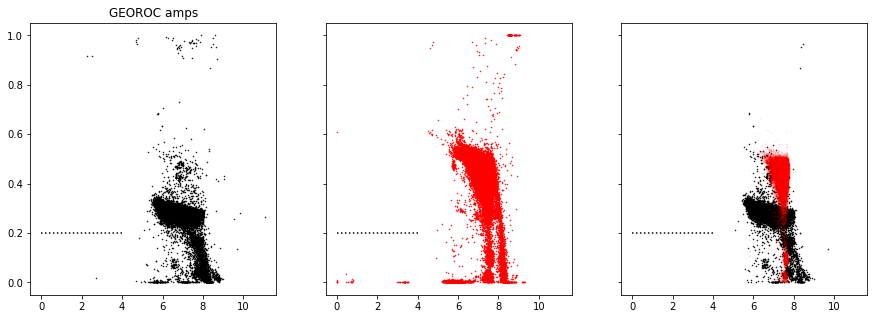

In [42]:
site="Si_T"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC cpxs')
ax1.set_title('GEOROC amps')

ax1.plot(Amp_sites_GEOROC_amp[site], Cpx_sites_GEOROC_amp['Ca_CaMgFe'], '.k', ms=1)
ax1.plot([0, 4], [0.2, 0.2], ':k')

ax2.plot(Amp_sites_GEOROC_cpx[site], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'], '.r', ms=1)
ax2.plot([0, 4], [0.2, 0.2], ':k')
ax3.plot(Amp_sites_GEOROC_amp[site].loc[fi_si_GEOROC], Cpx_sites_GEOROC_amp['Ca_CaMgFe'].loc[fi_si_GEOROC], '.k', ms=1)
ax3.plot(Amp_sites_GEOROC_cpx[site].loc[cpx_4_GEOROC], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'].loc[cpx_4_GEOROC], '.r', ms=1, alpha=0.1)

ax3.plot([0, 4], [0.2, 0.2], ':k')


#ax1.set_xlim([0, 4])

(0.0, 4.0)

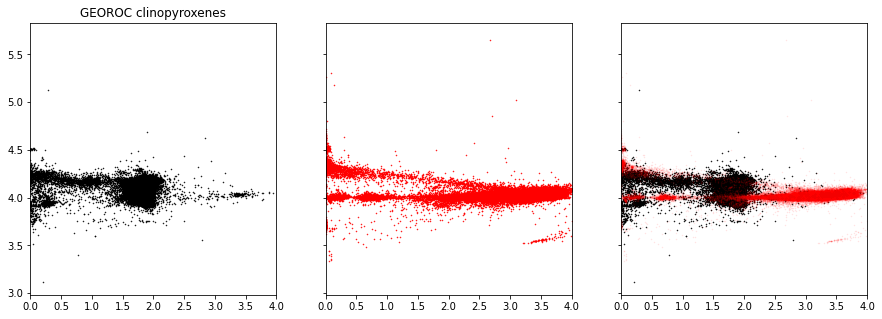

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC amphiboles')
ax1.set_title('GEOROC clinopyroxenes')

ax1.plot(Amp_sites_GEOROC_amp['Ca_B'], Cpx_sites_GEOROC_amp['Cation_Sum_Cpx'], '.k', ms=1)
ax2.plot(Amp_sites_GEOROC_cpx['Ca_B'], Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'], '.r', ms=1)
ax3.plot(Amp_sites_GEOROC_amp['Ca_B'], Cpx_sites_GEOROC_amp['Cation_Sum_Cpx'], '.k', ms=1)
ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'], Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'], '.r', ms=1, alpha=0.1)

ax1.set_xlim([0, 4])

(0.0, 1.0)

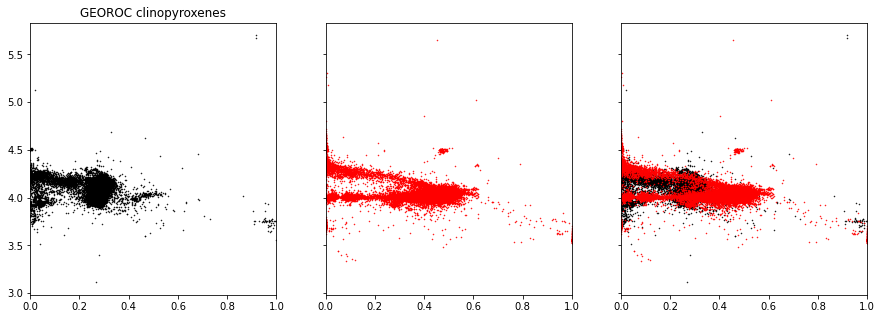

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC amphiboles')
ax1.set_title('GEOROC clinopyroxenes')

ax1.plot(Cpx_sites_GEOROC_amp['Ca_CaMgFe'], Cpx_sites_GEOROC_amp['Cation_Sum_Cpx'], '.k', ms=1)
ax2.plot(Cpx_sites_GEOROC_cpx['Ca_CaMgFe'], Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'], '.r', ms=1)
# ax3.plot(Amp_sites_GEOROC_amp['Ca_B'], Cpx_sites_GEOROC_amp['Cation_Sum_Cpx'], '.k', ms=1)
# ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'], Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'], '.r', ms=1, alpha=0.1)
ax3.plot(Cpx_sites_GEOROC_amp['Ca_CaMgFe'], Cpx_sites_GEOROC_amp['Cation_Sum_Cpx'], '.k', ms=1)
ax3.plot(Cpx_sites_GEOROC_cpx['Ca_CaMgFe'], Cpx_sites_GEOROC_cpx['Cation_Sum_Cpx'], '.r', ms=1)

ax1.set_xlim([0, 1])

In [48]:
Ca_class_amp=( (Amp_sites_GEOROC_amp['Ca_B']>1.5) &(Amp_sites_GEOROC_amp['Ca_B']<2.1) 
              & ((Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'])<0.5) )
Ca_class_GEOROC_amp_ox=Amp_amphead.loc[( (Amp_sites_GEOROC_amp['Ca_B']>1.5) & 
                                        (Amp_sites_GEOROC_amp['Ca_B']<2.1) & ((Amp_sites_GEOROC_amp['Na_A']+Amp_sites_GEOROC_amp['K_A'])<0.5) )]
Ca_class_GEOROC_Amp_sites_amp=Amp_sites_GEOROC_amp.loc[( (Amp_sites_GEOROC_amp['Ca_B']>1.5) &
                                        (Amp_sites_GEOROC_amp['Ca_B']<2.1) & ((Amp_sites_GEOROC_amp['Na_A']++Amp_sites_GEOROC_amp['K_A'])<0.5) )]

Ca_class_GEOROC_cpx_ox=Cpx_amphead.loc[( (Amp_sites_GEOROC_cpx['Ca_B']>1.5) &
                                        (Amp_sites_GEOROC_cpx['Ca_B']<2.1) & ((Amp_sites_GEOROC_cpx['Na_A']+Amp_sites_GEOROC_cpx['K_A'])<0.5) )]
Ca_class_GEOROC_Amp_sites_cpx=Amp_sites_GEOROC_cpx.loc[( (Amp_sites_GEOROC_cpx['Ca_B']>1.5) &
                                        (Amp_sites_GEOROC_cpx['Ca_B']<2.1) & ((Amp_sites_GEOROC_cpx['Na_A']++Amp_sites_GEOROC_cpx['K_A'])<0.5) )]

(0.0, 4.0)

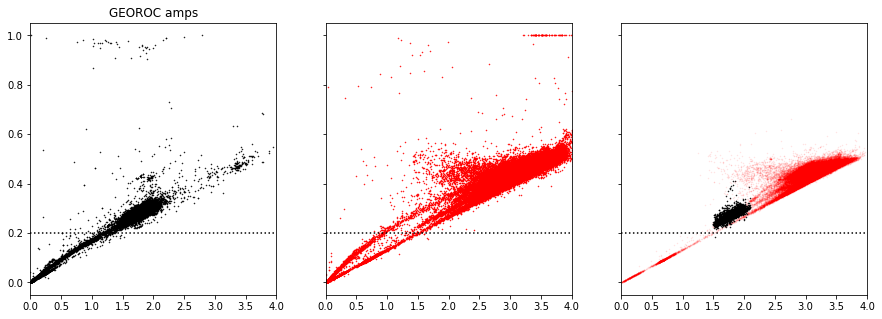

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
ax1.set_title('GEOROC cpxs')
ax1.set_title('GEOROC amps')

ax1.plot(Amp_sites_GEOROC_amp['Ca_B'], Cpx_sites_GEOROC_amp['Ca_CaMgFe'], '.k', ms=1)
ax1.plot([0, 4], [0.2, 0.2], ':k')

ax2.plot(Amp_sites_GEOROC_cpx['Ca_B'], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'], '.r', ms=1)
ax2.plot([0, 4], [0.2, 0.2], ':k')
ax3.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'].loc[cpx_4_GEOROC], '.r', ms=1, alpha=0.1)
ax3.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si&Ca_class_amp], Cpx_sites_GEOROC_amp['Ca_CaMgFe'].loc[fi_si&Ca_class_amp], '.k', ms=1)

ax3.plot([0, 4], [0.2, 0.2], ':k')


ax1.set_xlim([0, 4])

(0.1, 0.4)

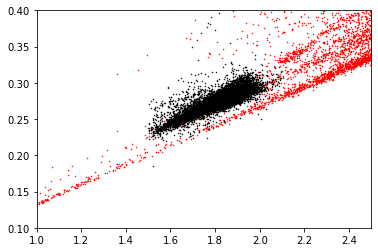

In [52]:
plt.plot(Amp_sites_GEOROC_cpx['Ca_B'].loc[cpx_4_GEOROC], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'].loc[cpx_4_GEOROC], '.r', ms=1, alpha=1)
plt.plot(Amp_sites_GEOROC_amp['Ca_B'].loc[fi_si&Ca_class_amp], Cpx_sites_GEOROC_amp['Ca_CaMgFe'].loc[fi_si&Ca_class_amp], '.k', ms=1)
plt.xlim([1,2.5])
plt.ylim([0.1,0.4])

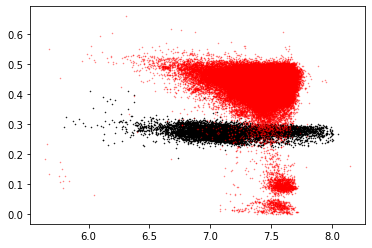

In [57]:

plt.plot(Amp_sites_GEOROC_amp['Si_T'].loc[fi_si&Ca_class_amp], Cpx_sites_GEOROC_amp['Ca_CaMgFe'].loc[fi_si&Ca_class_amp], '.k', ms=1)
plt.plot(Amp_sites_GEOROC_cpx['Si_T'].loc[cpx_4_GEOROC], Cpx_sites_GEOROC_cpx['Ca_CaMgFe'].loc[cpx_4_GEOROC], '.r', ms=1, alpha=0.5)

In [87]:
print(len(Ca_class_GEOROC_cpx_ox))
print(len(Ca_class_GEOROC_amp_ox))

865
9073


In [80]:
## There are only 2 B sites per formula unit, and Ca only goes into the B site, so this indicate analytical problem. Have filtered these ou

(0.0, 5.0)

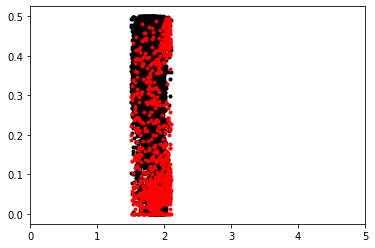

In [84]:
plt.plot(Ca_class_GEOROC_Amp_sites_amp['Ca_B'], Ca_class_GEOROC_Amp_sites_amp['Na_A']+Ca_class_GEOROC_Amp_sites_amp['K_A'], '.k')
plt.plot(Ca_class_GEOROC_Amp_sites_cpx['Ca_B'], Ca_class_GEOROC_Amp_sites_cpx['Na_A']+Ca_class_GEOROC_Amp_sites_cpx['K_A'], '.r')

plt.xlim([0, 5])

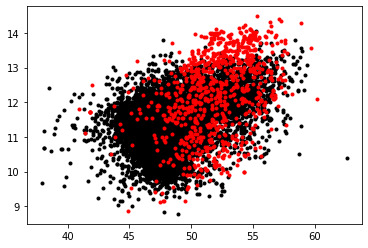

In [90]:
plt.plot(Ca_class_GEOROC_amp_ox['SiO2_Amp'], Ca_class_GEOROC_amp_ox['CaO_Amp'], '.k')
plt.plot(Ca_class_GEOROC_cpx_ox['SiO2_Amp'], Ca_class_GEOROC_cpx_ox['CaO_Amp'], '.r')
#plt.xlim([0, 5])

In [45]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']

LEPR_Amp_amp_sites=pt.get_amp_sites_from_input(amp_comps=LEPR_Amp_PreFilt)
LEPR_Amp=LEPR_Amp_PreFilt
LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf['Phase']=0

LEPR_Amp_cpx_heads=LEPR_Amp.copy()
LEPR_Amp_cpx_heads.columns = [col.replace('_Amp', '_Cpx') for col in LEPR_Amp_cpx_heads.columns]
LEPR_Amp_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Amp_cpx_heads)



(0.0, 3.0)

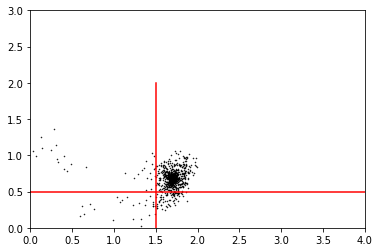

In [47]:
plt.plot(LEPR_Amp_amp_sites['Ca_B'], LEPR_Amp_amp_sites['Na_A']+LEPR_Amp_amp_sites['K_A'], '.k', ms=1)
plt.plot([1.5, 1.5], [0, 2], '-r')
plt.plot([0, 4], [0.5, 0.5], '-r')
# Need to be >1.5 on x axis, and <0. on the y axis. 
plt.xlim([0, 4])
plt.ylim([0, 3])

In [48]:
Ca_amphiboles_LEPR_oxides=LEPR_Amp_PreFilt.loc[( (LEPR_Amp_amp_sites['Ca_B']>1.5) & ((LEPR_Amp_amp_sites['Na_A']+LEPR_Amp_amp_sites['K_A'])<0.5) )]
Ca_amphiboles_LEPR_sites=LEPR_Amp_PreFilt.loc[((LEPR_Amp_amp_sites['Ca_B']>1.5) & ((LEPR_Amp_amp_sites['Na_A']+LEPR_Amp_amp_sites['K_A'])<0.5) )]

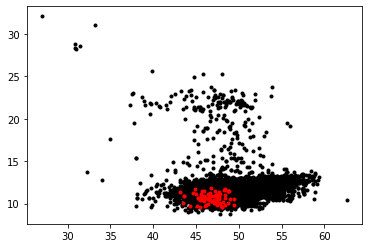

In [49]:
plt.plot(Ca_amphiboles_GEOROC_oxides['SiO2_Amp'], Ca_amphiboles_GEOROC_oxides['CaO_Amp'], '.k')
plt.plot(Ca_amphiboles_LEPR_oxides['SiO2_Amp'], Ca_amphiboles_LEPR_oxides['CaO_Amp'], '.r')

#plt.xlim([0, 5])

In [ ]:
pt.plot_amp_class_Leake(amp_comps=LEPR_Amp, text_labels=True, lower_text=0.2, upper_text=0.8, site_check=True)
# only plots ones in range. 

In [ ]:
a=3.95
b=4.95
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

LEPR_Cpx_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cpx_sites.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cpx_sites.Ca_CaMgFe
LEPR_Cpx=LEPR_Cpx_PreFilt #.loc[(LEPR_Cpx_Sums.between(a, b))]
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]
LEPR_Cpx_nosuf['Phase']=1
LEPR_Cpx_amp_heads=LEPR_Cpx.copy()

LEPR_Cpx_amp_heads.columns = [col.replace('_Cpx', '_Amp') for col in LEPR_Cpx_amp_heads.columns]
LEPR_Cpx_amp_sites=pt.get_amp_sites_from_input(amp_comps=LEPR_Cpx_amp_heads)

## GEOROC

In [ ]:
# import warnings as w
# with w.catch_warnings():
#     w.simplefilter('ignore')
#     GEOROC_Amp_in=pt.import_excel('GEOROC_Test_Amphibole.xlsx', sheet_name="AMPHIBOLES_reform")
#     GEOROC_Amp_input=GEOROC_Amp_in['my_input']
#     GEOROC_Amp_PreFilt=GEOROC_Amp_in['my_oxides']
    
# GEOROC_Amp_copy=GEOROC_Amp_PreFilt.copy()
# GEOROC_Amp_copy['Sum_Oxides']=GEOROC_Amp_PreFilt.sum(axis=1)
# GEOROC_Amp_copy['Sum_Oxides']
# GEOROC_Amp=GEOROC_Amp_PreFilt.loc[(GEOROC_Amp_copy['Sum_Oxides']>70) & 
#                                   (GEOROC_Amp_input['TECTONIC SETTING']!= "ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)")
#                                  & (GEOROC_Amp_input['TECTONIC SETTING']!= "nan")]
# GEOROC_Amp.to_excel('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered')    



In [ ]:
Amp_filt_in=pt.import_excel('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered')
Amp=Amp_filt_in['my_oxides']
Amp_amphead=Amp.add_suffix('_Amp')
Amp_amp_sites=pt.get_amp_sites_from_input(amp_comps=Amp_amphead)
Amp_cpxhead=Amp.add_suffix('_Cpx')
Amp_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=Amp_cpxhead)

In [ ]:
pt.plot_amp_class_Leake(amp_comps=myAmps1, text_labels=True, lower_text=0.2, upper_text=0.8, 
                        site_check=True)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    GEOROC_Cpx_in=pt.import_excel('GEOROC_Test_Clinopyroxene.xlsx', sheet_name="CLINOPYROXENES_reformat")
    GEOROC_Cpx_input=GEOROC_Cpx_in['my_input']
    GEOROC_Cpx_PreFilt=GEOROC_Cpx_in['my_oxides']
print('length prefilter')
print(len(GEOROC_Cpx_PreFilt))    
GEOROC_Cpx_copy=GEOROC_Cpx_PreFilt.copy()
GEOROC_Cpx_copy['Sum_Oxides']=GEOROC_Cpx_PreFilt.sum(axis=1)
GEOROC_Cpx_copy['Sum_Oxides']
GEOROC_Cpx=GEOROC_Cpx_PreFilt.loc[(GEOROC_Cpx_copy['Sum_Oxides']>70) & 
                                  (GEOROC_Cpx_input['TECTONIC SETTING']!= "ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)")
                                 & (GEOROC_Cpx_input['TECTONIC SETTING']!= "nan")]
print('len post filter')
print(len(GEOROC_Cpx))
GEOROC_Cpx.to_excel('GEOROC_Test_Clinopyroxene_Filt.xlsx', sheet_name='Filtered') 



In [ ]:
Cpx_filt_in=pt.import_excel('GEOROC_Test_Clinopyroxene_Filt.xlsx', sheet_name='Filtered')
Cpx=Cpx_filt_in['my_oxides']

Cpx_amphead=Cpx.add_suffix('_Amp')
Cpx_amp_sites=pt.get_amp_sites_from_input(amp_comps=Cpx_amphead)
Cpx_cpxhead=Cpx.add_suffix('_Cpx')
print('got to cpx components')
Cpx_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=Cpx_cpxhead)


## Oxides first

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(Cpx['SiO2'], Cpx['CaO'], '.r')
ax1.plot(Amp['SiO2'], Amp['CaO'], '.c', alpha=0.5)

ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.r')
ax2.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.c', alpha=0.5)

ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')

## GEOROC vs LEPR amphiboles

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['SiO2'], Cpx['CaO'], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.b', alpha=0.5, label='LEPR Cpx')
ax1.legend()

ax2.plot(Amp['SiO2'], Amp['CaO'], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')


ax3.plot(Cpx['SiO2'], Cpx['CaO'], '.g', label='GEOROC Cpx')
ax3.plot(Amp['SiO2'], Amp['CaO'], '.b', alpha=0.5, label='GEOROC Amp')
ax3.legend()

ax4.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.g', alpha=0.5, label='LEPR Cpx')
ax4.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['SiO2'], Cpx['Al2O3'], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['Al2O3'], '.b', alpha=0.5, label='LEPR Cpx')
ax1.legend()

ax2.plot(Amp['SiO2'], Amp['Al2O3'], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['Al2O3'], '.b',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('Al2O3')


ax3.plot(Cpx['SiO2'], Cpx['Al2O3'], '.y', label='GEOROC Cpx')
ax3.plot(Amp['SiO2'], Amp['Al2O3'], '.b', alpha=0.5, label='GEOROC Amp')
ax3.legend()

ax4.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['Al2O3'], '.g', alpha=0.5, label='LEPR Cpx')
ax4.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['Al2O3'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('Al2O3')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['MnO'], Cpx['K2O'], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['MnO'], LEPR_Cpx_nosuf['K2O'], '.g', alpha=0.5, label='LEPR Cpx')
ax1.legend()

ax2.plot(Amp['MnO'], Amp['K2O'], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['MnO'], LEPR_Amp_nosuf['K2O'], '.g',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('MnO')
ax1.set_ylabel('K2O')


ax3.plot(Amp['MnO'], Amp['K2O'], '.b', alpha=0.5, label='GEOROC Amp')
ax3.plot(Cpx['MnO'], Cpx['K2O'], '.g', label='GEOROC Cpx')

ax3.legend()

ax4.plot(LEPR_Amp_nosuf['MnO'], LEPR_Amp_nosuf['K2O'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.plot(LEPR_Cpx_nosuf['MnO'], LEPR_Cpx_nosuf['K2O'], '.g', alpha=0.5, label='LEPR Cpx')

ax4.legend()
ax1.set_xlabel('MnO')
ax1.set_ylabel('K2O')

## Amphibole sites
- DHZ says Al2o£ limited to 2 atoms per formula unit

In [ ]:
Cpx_amp_sites.head()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_amp_sites['Al2O3_Amp_cat_23ox'], Cpx_amp_sites['Na2O_Amp_cat_23ox']+Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')
ax2.plot(Amp_amp_sites['Al2O3_Amp_cat_23ox'], Amp_amp_sites['Na2O_Amp_cat_23ox']+Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')
ax3.plot(Cpx_amp_sites['Al2O3_Amp_cat_23ox'], Cpx_amp_sites['Na2O_Amp_cat_23ox']+Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')

ax3.plot(Amp_amp_sites['Al2O3_Amp_cat_23ox'], Amp_amp_sites['Na2O_Amp_cat_23ox']+Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(LEPR_Cpx_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Cpx_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')
ax2.plot(LEPR_Amp_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Amp_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')
ax3.plot(LEPR_Cpx_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Cpx_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')
ax3.plot(LEPR_Amp_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Amp_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(LEPR_Cpx_amp_sites['Si_T'], LEPR_Cpx_amp_sites['Mg_C']+LEPR_Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax2.plot(LEPR_Amp_amp_sites['Si_T'], LEPR_Amp_amp_sites['Mg_C']+LEPR_Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.plot(LEPR_Cpx_amp_sites['Si_T'], LEPR_Cpx_amp_sites['Mg_C']+LEPR_Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax3.plot(LEPR_Amp_amp_sites['Si_T'], LEPR_Amp_amp_sites['Mg_C']+LEPR_Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.legend()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_amp_sites['Si_T'], Cpx_amp_sites['Mg_C']+Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax2.plot(Amp_amp_sites['Si_T'], Amp_amp_sites['Mg_C']+Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.plot(Cpx_amp_sites['Si_T'], Cpx_amp_sites['Mg_C']+Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax3.plot(Amp_amp_sites['Si_T'], Amp_amp_sites['Mg_C']+Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.legend()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Jd'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Amp Sites Cpx LEPR')
ax2.plot(Amp_cpx_sites['Jd'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.plot(Cpx_cpx_sites['Jd'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Amp Sites Cpx LEPR')
ax3.plot(Amp_cpx_sites['Jd'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.legend()
ax1.set_xlabel('Jd')
ax2.set_ylabel('DiHd')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx  GEOROC')
ax2.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx  GEOROC')
ax3.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.legend()
ax1.set_xlabel('Cation_Sum_Cpx')
ax2.set_ylabel('DiHd')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_amp_sites['cation_sum_All'], '.r', label='Cpx  GEOROC')
ax2.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_amp_sites['cation_sum_All'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_amp_sites['cation_sum_All'], '.r', label='Cpx  GEOROC')
ax3.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_amp_sites['cation_sum_All'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.legend()
ax1.set_xlabel('Cation_Sum_Cpx')
ax2.set_ylabel('Amp sites Cationsum')

## Filter by cation sums

In [ ]:
lowcpx=3.95
highcpx=4.05
GEOROC_Cpx_3to4=Cpx_cpx_sites['Cation_Sum_Cpx'].between(lowcpx, highcpx)
GEOROC_Amp_3to4=Amp_cpx_sites['Cation_Sum_Cpx'].between(lowcpx, highcpx)
GEOROC_Cpx_15to16=Cpx_amp_sites['cation_sum_All'].between(15, 16)
GEOROC_Amp_15to16=Amp_amp_sites['cation_sum_All'].between(15, 16)
GEOROC_Cpx_2filt=GEOROC_Cpx_3to4# & GEOROC_Cpx_15to16
GEOROC_Amp_2filt= GEOROC_Amp_15to16#GEOROC_Amp_3to4 &

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['SiO2'].loc[GEOROC_Cpx_2filt], Cpx['CaO'].loc[GEOROC_Cpx_2filt], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.b', alpha=0.5, label='LEPR Cpx')
ax1.set_xlim([30, 62])
ax1.legend()

ax2.plot(Amp['SiO2'].loc[GEOROC_Amp_2filt], Amp['CaO'].loc[GEOROC_Amp_2filt], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')


ax3.plot(Cpx['SiO2'].loc[GEOROC_Cpx_2filt], Cpx['CaO'].loc[GEOROC_Cpx_2filt], '.g', label='GEOROC Cpx')
ax3.plot(Amp['SiO2'].loc[GEOROC_Amp_2filt], Amp['CaO'].loc[GEOROC_Amp_2filt], '.b', alpha=0.5, label='GEOROC Amp')
ax3.legend()

ax4.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.g', alpha=0.5, label='LEPR Cpx')
ax4.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.set_xlim([30, 62])
ax4.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')

In [ ]:
print('Percent passing cpx filter')
print(100*sum(GEOROC_Cpx_3to4)/len(Cpx_cpx_sites))
print('Percent passing amp filter')
print(100*sum(GEOROC_Amp_15to16)/len(Amp_cpx_sites))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Jd'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['Jd'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['Jd'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['Jd'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('Jd')
ax1.set_ylabel('DiHd')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(LEPR_Cpx_cpx_sites['Jd'], LEPR_Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx LEPR')
ax2.plot(LEPR_Amp_cpx_sites['Jd'], LEPR_Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp LEPR')
ax3.plot(LEPR_Cpx_cpx_sites['Jd'], LEPR_Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx LEPR')
ax3.plot(LEPR_Amp_cpx_sites['Jd'], LEPR_Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp LEPR')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('Jd')
ax1.set_ylabel('DiHd')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['CaTs'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['CaTs'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['CaTs'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['CaTs'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('CaTs')
ax2.set_ylabel('DiHd')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('CaTi')
ax2.set_ylabel('DiHd')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('CaTi')
ax2.set_ylabel('Ca/CaMgFe')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='SiO2_Cpx'
ax1.plot(Cpx_cpx_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel('Ca/CaMgFe')

In [ ]:
Cpx_amp_sites['Si_T']

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Fe_B'
ax1.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel('Ca/CaMgFe')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Fe_B'
yaxis='Si_T'
ax1.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Si_T'
yaxis='Ca_B'
ax1.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)

ax1.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax2.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax3.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax3.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Mg_B'
yaxis='Si_T'
ax1.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax2.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax3.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax3.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

In [ ]:
Cpx_amp_sites

## Does amphibole offset from total correlate with anthing?

In [ ]:
Amp_input=Amp_filt_in['my_input']

In [ ]:
Sum_GEOROC_Amp=Amp_input.sum(axis=1)-Amp_input['Unnamed: 0']

In [ ]:
plt.plot(Sum_GEOROC_Amp,Amp_amp_sites['cation_sum_All'], '.k' )

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))#, sharey=True, sharex=True)
filt=Amp_amp_sites['cation_sum_All'].between(13, 18)
ax1.plot(Amp['SiO2'].loc[filt],Amp_amp_sites['cation_sum_All'].loc[filt],  '.k')
ax2.plot( Amp['CaO'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt],'.k')
ax3.plot( Amp['Al2O3'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt],'.k')
ax4.plot(Amp['MnO'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt], '.k')
ax5.plot(Amp['K2O'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt], '.k')
ax6.plot(Amp['Na2O'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt], '.k')